In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("classified-data.csv")

In [3]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
df.isnull().sum().sum()      #Total number of null values in df before cleaning

25062

# Exploratory Data Analysis

# Data Cleaning 1

In [7]:
df.drop(['Customer ID','Name','Property ID','Expense Type 1','Expense Type 2','Property Age'], axis=1, inplace=True)

In [8]:
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].replace(to_replace=-999,value=np.nan)

In [9]:
df['Co-Applicant'] = df['Co-Applicant'].replace(to_replace=-999,value=0)

# Plot 1

<AxesSubplot:>

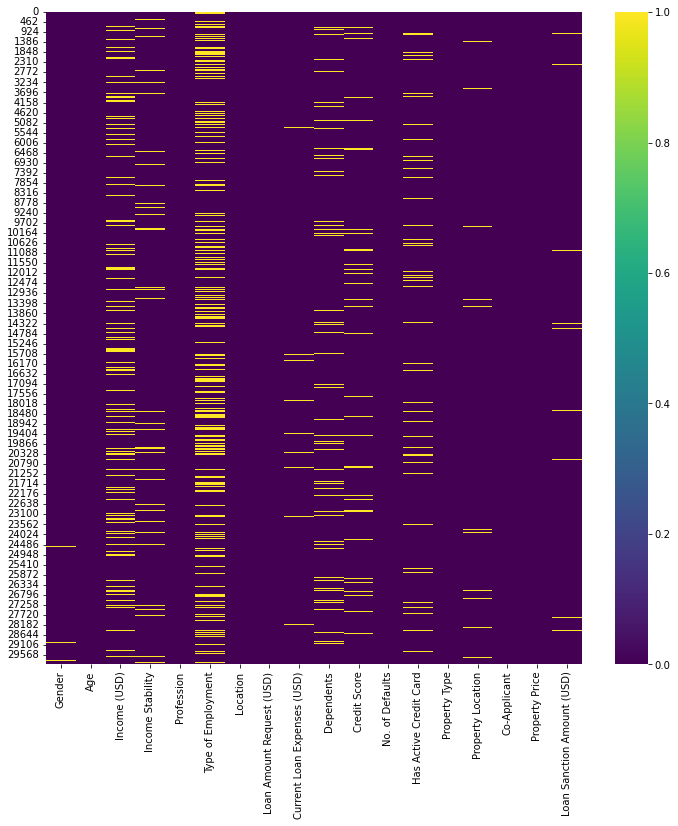

In [10]:
plt.figure(figsize = (12,12))
sns.heatmap(df.isnull(), cmap='viridis')

# Plot 2

<AxesSubplot:xlabel='Income Stability', ylabel='Age'>

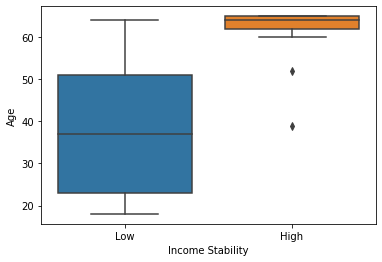

In [11]:
sns.boxplot(x='Income Stability',y='Age',data=df)

# Data Cleaning 2

In [12]:
def impute_Stability(cols):
        IncomeStability= cols[0]
        Age= cols[1]
        if pd.isnull(IncomeStability):
            if Age>60:
                return 'High'
            else:
                return 'Low'
        else:
            return IncomeStability

In [13]:
df['Income Stability']= df[['Income Stability','Age']].apply(impute_Stability, axis=1)

# Plot 3

<AxesSubplot:xlabel='Property Location', ylabel='Property Type'>

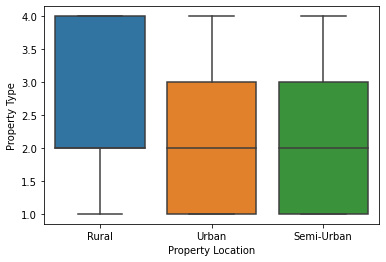

In [14]:
sns.boxplot(x='Property Location',y='Property Type',data=df)

# Data Cleaning 3

In [15]:
def impute_loc(cols):
        PropertyLocation= cols[0]
        PropertyType= cols[1]
        if pd.isnull(PropertyLocation):
            if PropertyType==1:
                return 'Urban'
            elif PropertyType==2:
                return 'Semi-Urban'
            else:
                return 'Rural'
        else:
            return PropertyLocation

In [16]:
df['Property Location']= df[['Property Location','Property Type']].apply(impute_loc, axis=1)

# plot 4

<AxesSubplot:xlabel='Dependents', ylabel='Income Stability'>

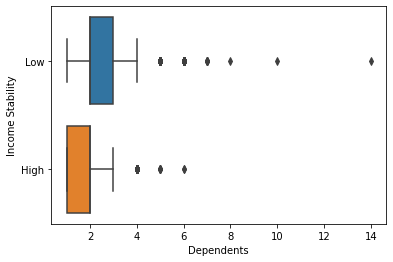

In [17]:
sns.boxplot(x='Dependents',y='Income Stability',data=df)

# Data Cleaning 4

In [18]:
def impute_dep(cols):
        dep= cols[0]
        stab= cols[1]
        if pd.isnull(dep):
            if stab=='High':
                return 3
            else:
                return 4
        else:
            return dep

In [19]:
df['Dependents']= df[['Dependents','Income Stability']].apply(impute_dep, axis=1)

In [20]:
df['Income (USD)'] = df['Income (USD)'].replace(to_replace=np.nan,value =df['Income (USD)'].mean())

In [21]:
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].replace(to_replace=np.nan,value =df['Current Loan Expenses (USD)'].mean())

In [22]:
df['Credit Score'] = df['Credit Score'].replace(to_replace=np.nan,value =df['Credit Score'].mean())

In [23]:
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].replace(to_replace=np.nan,value =df['Loan Sanction Amount (USD)'].mean())

In [24]:
df=df.fillna(method= 'ffill')

# Plot 5

<AxesSubplot:>

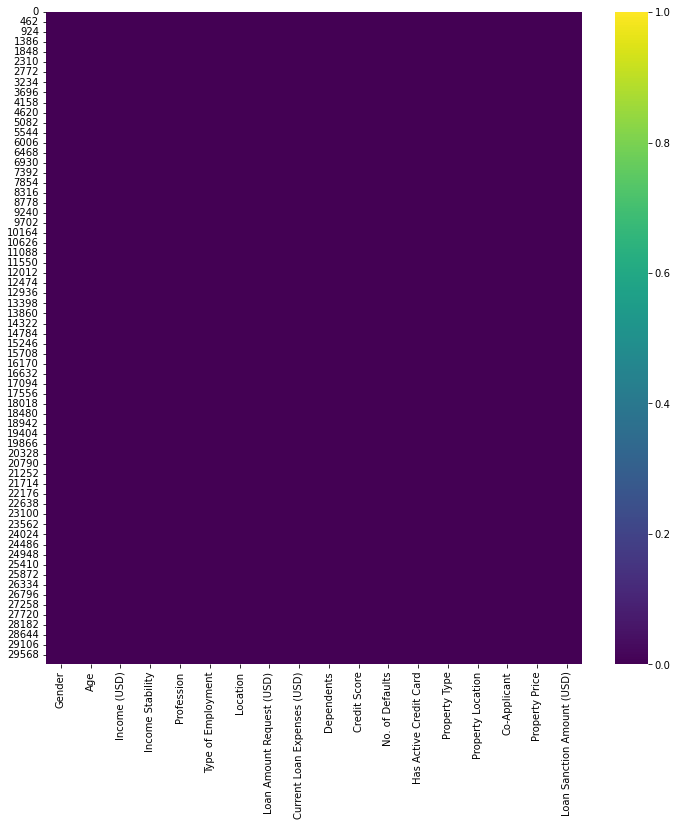

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap(df.isnull(), cmap='viridis')

# Plot 6

<AxesSubplot:xlabel='Location', ylabel='Loan Amount Request (USD)'>

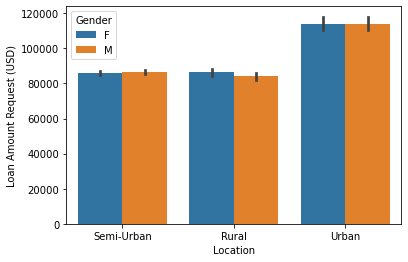

In [26]:
sns.barplot(x='Location',y= 'Loan Amount Request (USD)',hue='Gender',data=df)

# Plot 7

<AxesSubplot:xlabel='Profession', ylabel='Loan Amount Request (USD)'>

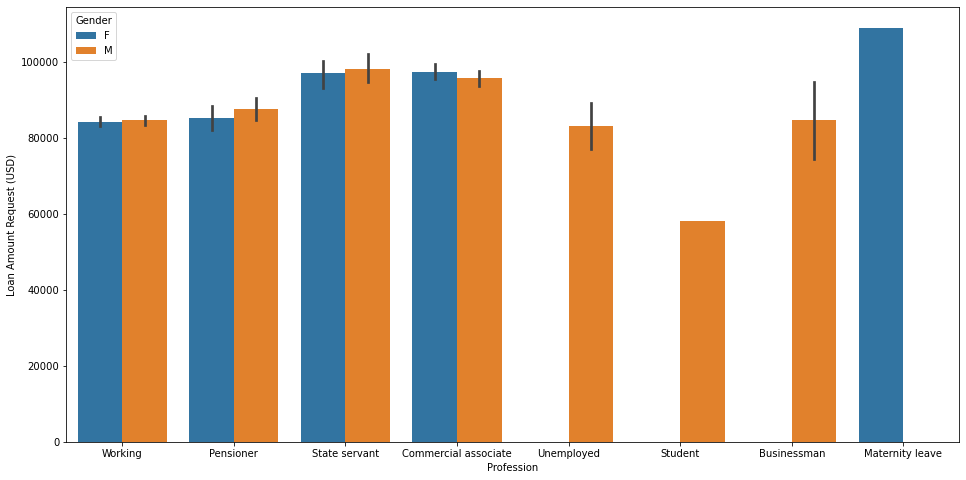

In [27]:
plt.figure(figsize = (16,8))
sns.barplot(x='Profession',y='Loan Amount Request (USD)',hue='Gender',data=df)

# Plot 8

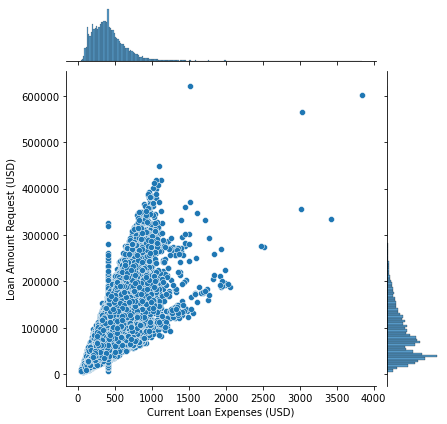

In [28]:
sns.jointplot(x='Current Loan Expenses (USD)',y='Loan Amount Request (USD)',data=df)

# Plot 9

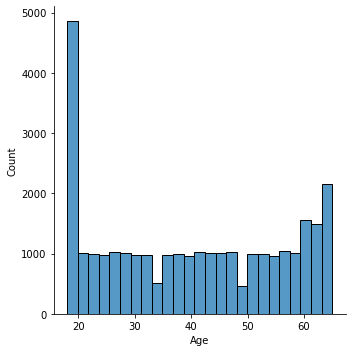

In [29]:
sns.displot(df['Age'])

# Plot 10

<AxesSubplot:xlabel='Profession', ylabel='Age'>

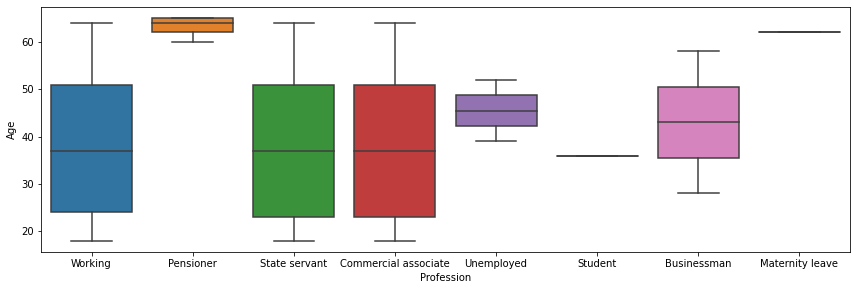

In [30]:
plt.figure(figsize = (14.5,4.5))
sns.boxplot(x='Profession',y='Age',data=df)

# Data Cleaning 5

# One-Hot Encoding

In [31]:
sex=pd.get_dummies(df['Gender'], drop_first=True)

In [32]:
lowstability=pd.get_dummies(df['Income Stability'], drop_first=True)

In [33]:
df=pd.concat([df,sex,lowstability], axis=1)

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()

In [35]:
df['Professions']=l.fit_transform(df['Profession'])

In [36]:
df['creditcard']=l.fit_transform(df['Has Active Credit Card'])

In [37]:
df['emptype']=l.fit_transform(df['Type of Employment'])

In [38]:
df.drop(['Gender','Income Stability','Profession','Location','Has Active Credit Card','Property Location','Type of Employment'], axis=1, inplace=True)

In [39]:
df.isnull().sum().sum()                             #Total number of null values in df after cleaning.

0

# ML Algorithms

# Linear Regression Model

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Loan Sanction Amount (USD)',axis=1), 
                                                    df['Loan Sanction Amount (USD)'], test_size=0.2, random_state=62)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)
pred1 = lm.predict( X_test)
score = r2_score(y_test,pred1)
print("R2_Score: ",np.round(score,decimals=4))

R2_Score:  0.6442


# Decision Tree Regression Model

In [41]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
pred2 = clf.predict(X_test)
score = r2_score(y_test,pred2)
print("R2_Score: ",np.round(score,decimals=4))

R2_Score:  0.5016


# Support Vector Regression Model

In [42]:
from sklearn.svm import SVR
model = SVR(C=1000.0)
model.fit(X_train,y_train)
pred3 = model.predict(X_test)
score =r2_score(y_test,pred3)
print("R2_Score: ",np.round(score,decimals=4))

R2_Score:  0.4402


# Random Forest Regression Model

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rf = rfr.predict(X_test)
score = r2_score(y_test,pred_rf)
print("R2_Score: ",np.round(score,decimals=4))

R2_Score:  0.7461


# Bayesian Regression Model

In [44]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
predic = reg.predict(X_test)
score = r2_score(y_test,predic)
print("R2_Score: ",np.round(score,decimals=4))

R2_Score:  0.6442
